In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../dataset/House Pricing.csv")

In [3]:
data = data.replace(to_replace = ['yes','no'],value = ['1','0'])
data = data.replace(to_replace = ['furnished','semi-furnished','unfurnished'], value = ['2','1','0'])

In [4]:
data["mainroad"] = data["mainroad"].astype(str).astype(int)
data["guestroom"] = data["guestroom"].astype(str).astype(int)
data["basement"] = data["basement"].astype(str).astype(int)
data["hotwaterheating"] = data["hotwaterheating"].astype(str).astype(int)
data["airconditioning"] = data["airconditioning"].astype(str).astype(int)
data["prefarea"] = data["prefarea"].astype(str).astype(int)
data["furnishingstatus"] = data["furnishingstatus"].astype(str).astype(int)

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [6]:
data.shape

(545, 13)

In [7]:
data.dtypes.value_counts()

int32    7
int64    6
Name: count, dtype: int64

In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
print(data['price'].min() , data['price'].max())
data = data.query('price > 0')

1750000 13300000


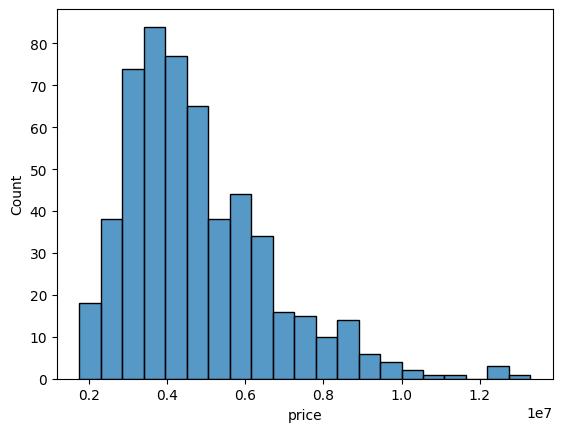

In [12]:
sns.histplot(data=data, x='price')
plt.show()

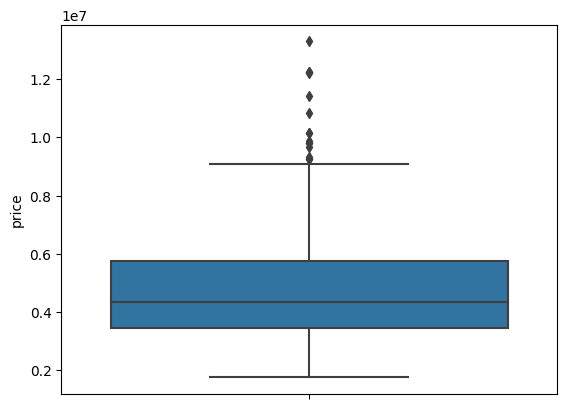

In [13]:
sns.boxplot(data=data , y='price')
plt.show()

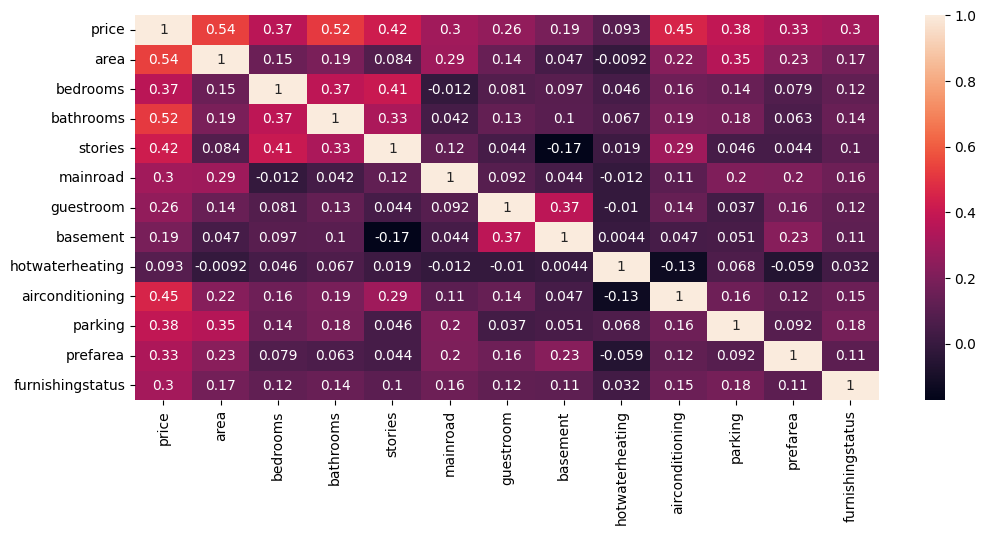

In [14]:
plt.figure(figsize=(12, 5))
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.show()

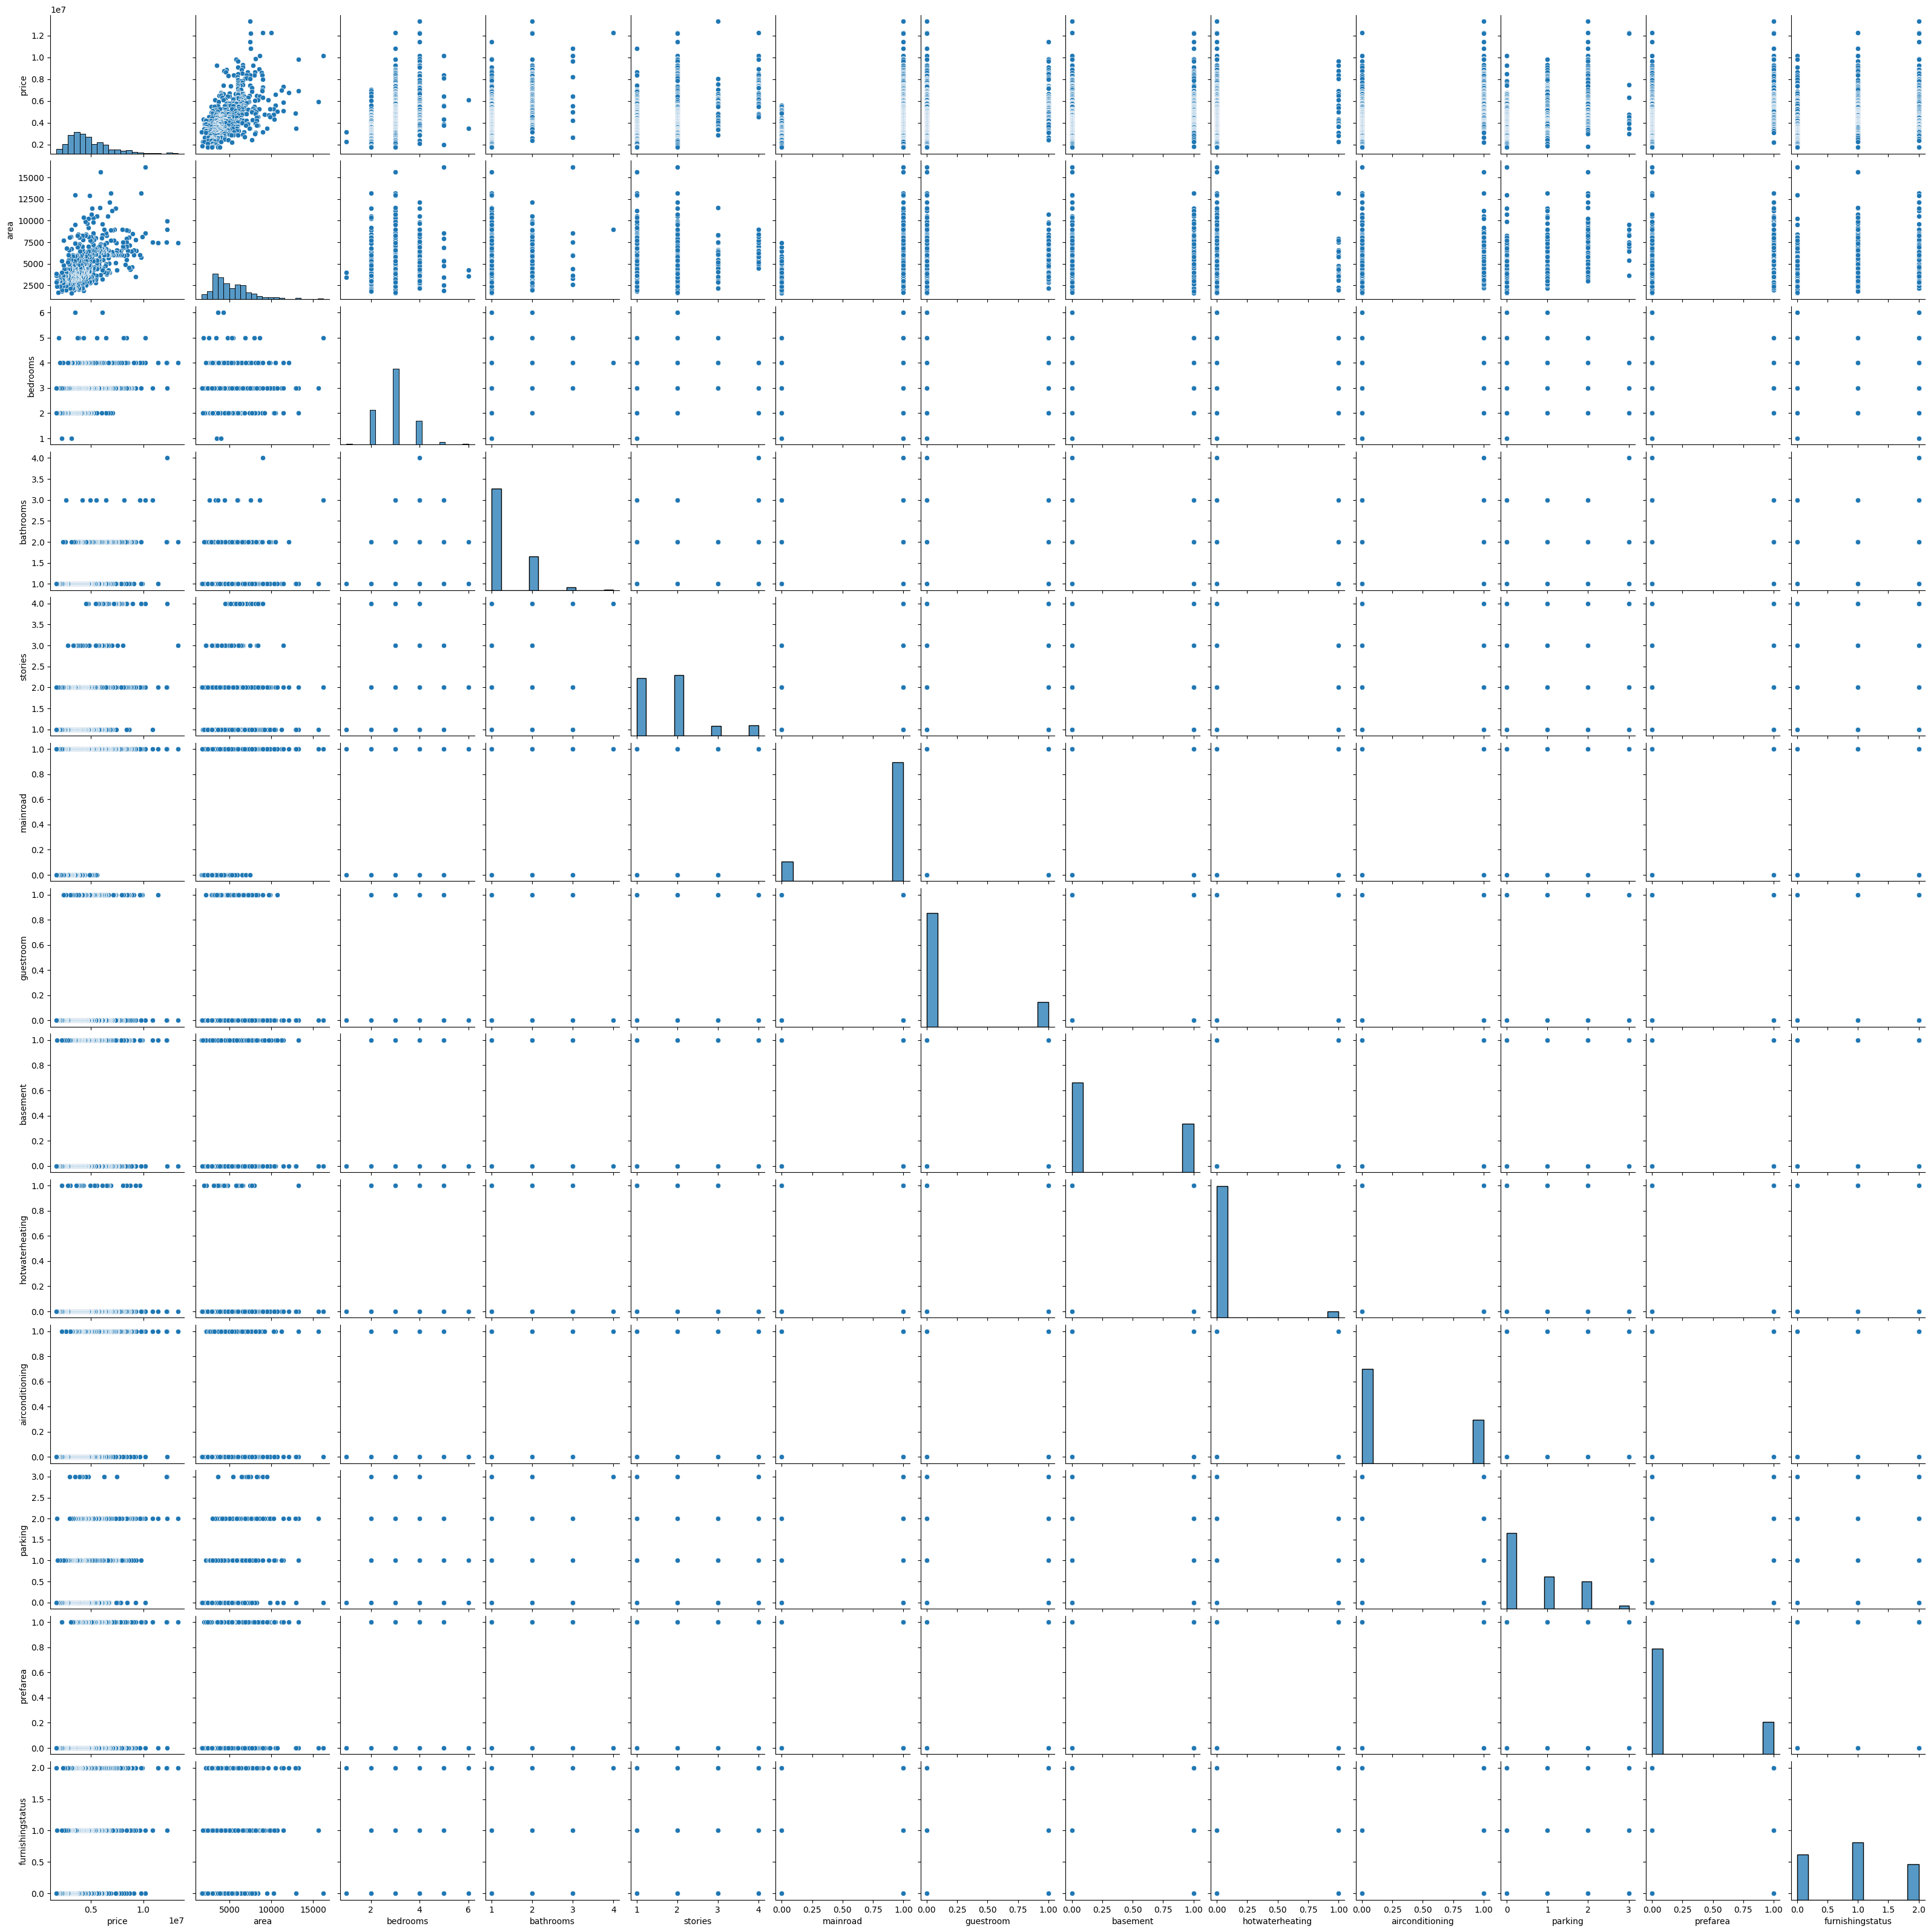

In [15]:
sns.pairplot(data)
plt.show()

In [16]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1


In [17]:
features = data.drop('price', axis=1)
target = data.price.values

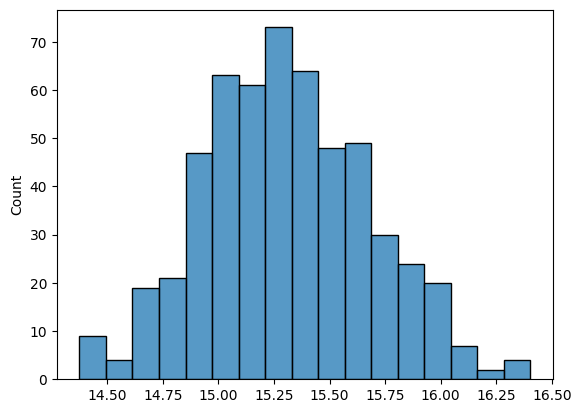

In [18]:
target_logged = np.log(target)
sns.histplot(target_logged)
plt.show()

In [19]:
features.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

cols = data.columns.to_list()
c_wanted = []

for c in cols:
    if c.startswith('s'):
        c_wanted.append(c)
        
poly_features = data[c_wanted]

scores = []
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(poly_features)
polyies = pd.DataFrame(poly_features, columns = poly.get_feature_names_out())

scaler = RobustScaler()
nums = scaler.fit_transform(polyies)

nums_scaled = pd.DataFrame(nums, columns = scaler.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(nums_scaled, target_logged, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
mean_absolute_error=  metrics.mean_absolute_error(model.predict(X_test), y_test)

In [21]:
print(mean_absolute_error)

print('-'*100)
measures = pd.DataFrame(np.column_stack((model.predict(X_test), y_test)), columns=['prediction', 'actual'])
measures['error'] = measures.iloc[:,0] - measures.iloc[:,1]
measures.head(10)

0.31774830008122834
----------------------------------------------------------------------------------------------------


,prediction,actual,error
0,15.295329,15.216694,0.078636
1,15.481610,15.710127,-0.228517
2,15.201709,15.126542,0.075167
3,15.295329,15.678039,-0.382710
4,15.201709,14.845130,0.356579
5,15.201709,15.404746,-0.203037
6,15.201709,15.473739,-0.272030
7,15.295329,15.329098,-0.033769
8,15.201709,14.711599,0.490110
9,15.201709,15.025366,0.176343
